# 1 Intro 

In the past decade (2010–2020), an entire body of knowledge on causal identification was popularized by Judea Pearl and his team.

The questions to be answered by causal inference are inherently “what if”s. ML is awful at those questions.

>“the new wave of artificial intelligence does not actually bring us intelligence but instead a critical component of intelligence —- prediction.”

For example,

>"in many industries, low prices are associated with low sales. For example, in the hotel industry, prices are low outside the tourist season, and prices are high when demand is highest and hotels are full. Given that data, a naive prediction might suggest that increasing the price would lead to more rooms sold."

Most data scientists know a lot of ML and not much causal inference; this leads to an abundance of ML models being deployed where they are not useful for the task at hand. Think of ML as a toolbox, not as prediction as the solution to all things. 


**Definition:** The <u>unit of analysis</u> in a causal inference study is usually the thing you wish to intervene on (treat). 


e.g.
- The unit of analysis in a test of a medication on blood pressure is likely to be individual people.
- in a test to see if billboards in a city lead to increased sales in that city, the unit of treatment is individual cities.

## Notation and terminology
- The treatment for unit $i$ is $T_i=1$ if $i$ recieved treatment (e.g. "is on sale" feature with a timestamp)
- outcome for unit $i$ is $Y_i$ (e.g. weekly_amount_sold)
- $\leftarrow$ means "is caused by"

On next review define exogenous and endogenous variables, please. 

**Definition:** In a model, an <u>exogeneous variable</u> is a quantity in the model that is intended to be observed and used as an input to the model. 



e.g.of a system of causations 

$T\leftarrow f_t(u_t)$ means that $u_t$, a set of variables I’m not explicitly modeling (also called exogenous variables), causes the treatment $T$ via the function $f_ t$. 

$Y\leftarrow f_y(T,U_y)$ means that   $T$ alongside another set of variables $u_y$ (which I’m also choosing not to model) jointly causes the outcome $Y$ via the function $f_y$. 

e.g. 
$$
\text{is_on_sale} \leftarrow f_t(u_t)\\
\text{amount_sold} \leftarrow f_y(\text{is_on_sale},u_y)
$$


However, you might want to take into account that larger businesses can engage in more aggressive sales by making an endogenous feature called 
`business_size` and the system of causality (my phrase)
$$
\text{business_size} \leftarrow f_s(u_s)\\
\text{is_on_sale} \leftarrow f_t(\text{business_size}, u_t)\\
\text{amount_sold}\leftarrow f_y(\text{is_on_sale},\text{business_size},u_y)
$$

**Definition:** The <u>fundamental problem of causal inference</u> is that you can never observe the same unit with and without treatment.

**Notation:** To indicate that treatment assignment $T$ is a constant function of participant $i$ "the $do(\cdot)$ operator" is often used; $do(T=t_0)$.

e.g. note the difference
- A condition on a variable: $\mathbb{E}[\text{amount_sold} | do(\text{is_on_sale} =1)]$ refers to what would’ve happened if you forced every business to engage in sales, not just the big businesses. 
- A condition on an intervention: $\mathbb{E}[\text{amount_sold}|\text{is_on_sale=1}]$ refers to what happened to the businesses engaged in sales, which mich just be the big businesses, and thus might be bigger than the quantity above. 

The $do$ operator is an example of an "intervention." I don't feel like I have a full definition of this. 

(Me: the $do$ operator seems to refer to conditions that include counterfactuals.)

**Definition:** The <u>individual treatment effect</u> is the difference of outcomes $\tau_i= Y_i|do(T=t_1) - Y_i|do(T=t_0)$. 

Reiterating: $Y$ is called outcome, some differences in outcomes are called efects. I have a habit of calling $Y$ effect.  

ITE is the change in outcome of $i$ due to treatment of $i$. One of the two terms in the difference is a counterfactual. (Fraser would say $Y_{i1} - Y_{i_0})$. Indeed Facure defines, generalizing from binary treatment to $>2$ values of $t$, 
$$
\begin{array}{ll}
Y_{ti} &:= Y_i|do(T_i = t)\\
Y(t)_i & =: Y_i|do(T_i = t)\\
\end{array}
$$

"factual potential outcome" vs "counterfactual potential outcome"

e.g. $\text{amount_sold}_{0i}$ is the potential outcome for the no treatment case for unit $i$. 

With this notation the individual treatment effect for binary treatment is
$$
\tau_i= Y_i|do(T=1) - Y_i|do(T=0)=Y_{1i} - Y_{0i}
.$$ 

**Definition:** The process of eliminating from expressions any quantities that are not observable  is <u>identificiation</u>. 

**Definition:** The <u>conditional independece assumption</u> (CIA) is that potential outcomes are independent of treatment conditioned on confounding variables $X$; it is the assumption that $Y(0),Y(1) \perp T | X$.  

(aka ignorability, ignorable treatment assignment, exogeneity, exchangability)

If CIA holds then treatment acts like it was randomized, and so the CIA holds. 

## Consistency
Consistnecy of treatment has two parts;
1. The range of T covers all treatment values
    - e.g. if 5 different dose size were given and you use a boolean "treated" then you violate this assumption
2. The treatment values are quantifiable in a precise way
    - e.g. If T is vauge, like "recieved help" then the consistency assumption is violated



## Stable Unit Treatment Values

SUTVA 
- The treatment of one does not affect the individual treatment effect  of others;
    - Alice and Bob are close. In giving a vaccine to Alice, the people around allice are less likely to get sick, so the treatment of allice influences the individual treatment effect of Bob. This is a violation of the SUTA assumption. 
    
**Definition:** In <u>spillover</u>, control units get some treatment effect. 

To deal with spillovers, you can expand the definition of a treatment effect to include the treatment effect that comes from other units and use more flexible models to estimate those effects. 

## Causal Quantities 

**Definition:**  The <u>average treatment effect</u> is $ ATE := E(\tau_i) = \mathbb{E}(Y_{1i} - Y_{0i} )= \mathbb{E}[Y | do(T=1)] −\mathbb{E}[Y | do(T=0)] $. 



This differes from what I saw in Fraser in that the expectation value is over both the treated and untreated groups. 

In the case of continuous set of treatment values $\text{ATE}= \frac{\partial}{\partial t} \mathbb{E}(Y|do(T=t))$. 

**Definition:** <u>Average treatment effect on the treated</u> $\text{ATT} = \mathbb{E}[Y_{1i}-Y_{0i} | T=1]$. 

Woah... Fraser called this ATE. This name make a lot of sense for this quantitity! I think Fraser made a mistake! 

**Definition:** The <u>conditional average treatment effects</u> $\text{CATE}=E[Y_{1i}−Y_{0i} | X=x]$. 

## Bias

Cusal inference problems can be broken into two steps: (parens are my additions)

1. Identification (estimation), where you figure out how to express the causal quantity of interest in terms of observable quantities (without introducing bias).
2. (emperical) Estimation, where you actually use data to estimate the causal quantity identified earlier.

(Those names seems wrong in the language of statistics; extimators are statistics, estimates are not summary quantities.)

A mistep in either case can give us bias. There is not a single agreed upon definition of bias in causal inference, there are lots of kinds. 

Exchangeability seems to be their term for ignorable treatment assignment. 

In the image below, I show that association is not equal to ATE; hte ITE for each unit is the same, and thus easy to see, while the association is the difference between averages of blue points and average of green points. 

<img src="images/IMG_6843.JPG" width = "400">

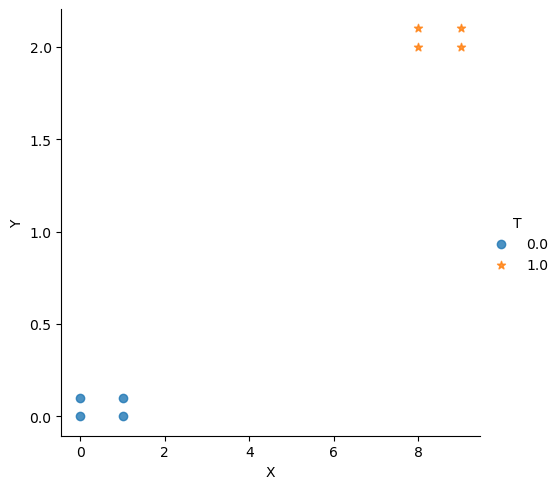

In [32]:
import pandas as pd
import seaborn as sns

n = 2
TE = .1 
pretreatment_het_bias = 2

df = pd.DataFrame(columns = ['X','Y','PO','T'])

def generate_untreated_group(n):
    for i in range(n):
        # PO=0
        df.loc[i] = [  i,0,     0,0]
        # PO=1
        df.loc[n+i] = [i, 0+TE, 1,0]
        # T=1
        # PO=0
        df.loc[2*n+i] = [8 + i,pretreatment_het_bias,     0,1]
        # PO=1
        df.loc[3*n+i] = [8 + i,pretreatment_het_bias + TE,1,1]
    pass

generate_untreated_group(n)

sns.lmplot(data=df,x='X',y='Y', 
           hue='T', 
           ci=None, fit_reg = False, 
           markers=['o','*'] # I'd like another way to distinguish on PO
           # perhaps I need to combine T and PO into a single variable for hue to work on? 
           # What would be great is shape for PO =1 or PO = 0
          );

Their words for what is shown in this picture are "the treated and untreated are not balanced" but I want a definition of balanced. 

There is not clear concensus on how to evaluate balance, but one suggestion is the evaluate the following normalized difference of means for each feature $f$
$$
\frac{\mu_{f1} - \mu_{f0}}{\sqrt{\frac{\sigma^2_{f1} +\sigma^2_{f0}}{2}} }
$$
where $fT$ is for feature $f$ and treated group $T=\{0,1\}$, 0 is for control group. A candidate threshold for "unbalanced" is 0.5. 

Note that this kind of unbalance has a higher chance of appearing in small datasets. 

# 2 Randomized experiments and Stats Review

---
I write this because it sounds like our Skynet X problem: 

Say that the customers who received an email converted more:
$E[ Y|\text{Conversion Email} = 1 ]> E [ Y|\text{Conversion Email} = 0]$

The marketing team sent emails to customers who they thought were more likely to convert in the first place. This is very strong evidence of pre-treatment heterogeneity bias. 

---


Always ask yourself what would be the perfect experiment to answer your question. Randomize Control Trials are the answer, but what would that look like for your case? 


## Hypothesis testing 
To decide if the difference in conversin rates between Email treatments is significant, 

### CI

0. Form the null hypothesis that the difference of conversion rate means for treated and untreted is zero and set the significance level$\alpha = 5\%$.
1. calculate the mean and standard error of conversion rate (i.e. feature $Y$) for both values of $T\in\{0,1\}$; 
    - $\mu_T = duh$
    - $\text{SE}_T = \frac{\hat{\sigma}}{\sqrt{n_T}}$
2. Note that these represent mean and standard deviation of sample distributions, which are normal by the central limit theorem 
3. Note that the difference between two normal distributions $N(\mu_1\sigma^2_1) - N(\mu_0,\sigma^2_0) = N(\mu_1-\mu_2, \sigma^2_1+\sigma_0^2)$
4. Calculate the 95% CI and note that the value in the null hypothesis 0, is outside of 1.96 standard deviations of this difference distribution, thus outside the CI.
5. Reject the null hypothesis with 95% confidence. 

They also discuss the hypothesis that the difference of means is 1%, in which $N(\mu_1-\mu_2, \sigma^2_1+\sigma_0^2)$ is simply replaced with $N(\mu_1-\mu_2-0.01, \sigma^2_1+\sigma_0^2)$ and it is observed that 0 is outside this dist (of course you could see where 1% falls in the former, the two ideas are equivalent.)

### t-test
Another option for a null hypothesis of the form $\Delta \mu =0$ is the t-statistic 
$$
t_\Delta = \frac{(\mu_0 - \mu_1) - H_0}{\sqrt{\frac{\sigma_0^2}{n_0} + \frac{\sigma_1^2}{n_1}}}
$$

Larger values of the statistic are interpreted as farther from the hypothesis. 

This is in line with my idea of the t-distribution as the distribution of an experssion in $X\sim N(0,1)$ that is
$$
\frac{X_n}{\text{SE}(X_n)}
$$
... but I know I need a slightly better intuition for it. What can I learn here? 
- The denominator normalizes the variance to ensure that $t \sim N(0,1)$ if the null is true. ( I think that might be not quite the truth. ) 
- Technically, "normal distribution" is not accurate; use the $t$ distribution with $\text{dof}=n-1$ when looking up the CDF inversee of the t-value. For $n>$ 100 the difference is nugatory. 
- Thus under the null hypothesis, $t$ values outside $(-1.96,1.96)$ appear less than 95% of the time; observing such a value allows us to reject $H_0$ with conficence level 95\%.




## p-values

A weak point of mine. Lets go. 

"the true definition of p-values can be very confusing. " 

**Definition**(wikipedia): "The <u>p-value</u> is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.”

i.e. p-value is $P (data |H_0) = P (X_n = x_n |H_0)$.

In the case of a t-test, $p$ is the area under the t-distribution beyond the observed value of the statistic. There is the one sided and there is the two sided. In the latter just multipy by 2 (since the t-distribution is symmetric.)

Me: $\alpha$ is a threshold; if $p>\alpha$ then keep the null hypothesis ( there is a chance!)

**Definition:** The probability that a test correctly rejects the null hypothesis is called the <u>power</u> of the test. 

striking: the ends $a_n,b_n$ of the 95% confidence interval $(a_n,b_n)$ obtained from a sample size $n$ has sampling distribution that also follows a normal distribution. THis makes sense; it is just the sampling distribution of the mean shifted by $1.96 \text{SE}$.

In order to have $δ − 1.96SE > 0$ a fraction 80% of the time you need the difference to be $\delta > 1.96SE + 0.84SE$.
- 1.96SE to give a 95% CI since $\Phi(.95)=1.96$
- 0.84SE so that the lower end of $(a,b)$ falls above zero 80% of the time since $\Phi(.80)=.84$.

Consider the image below. Let 
- $\mu^*$ be the true mean
- $H_0: \mu =\mu_0$ 
- $ \delta^* = \mu_0 - \mu^*$ ( which is negative in the image.)
- $\delta_n = \mu_0-X_n$
- $\color{blue}{f_{\delta_n}}$ be the sampling distribution for $\delta_n$
- $b_n:=\delta_n+\Phi(.95)SE_n$ be the right end of the 95% CI for $\color{blue}{f_{\delta_n}}$
- $\color{green}{f_{b_n}}$ be the sampling distribution for $b_n$
- $\color{magenta}{d_n} := b_n +\Phi(.80)SE_n$ be the right end of the 80% CI for $\color{green}{f_{b_n}}$

The null hypothesis is thus $H_0:\delta =0$.

Then, in order to reject the null hypothesis 80% of the time because $b_n< 0$  (so that 0 is not in  the 95% CI $(a,b)$) 
$$
d_n<0\\
\Leftrightarrow b_n+\Phi(.95)SE_n <  0\\ 
\Leftrightarrow \delta_n + \Phi(.80)SE_n +\Phi(.95)SE_n < 0
$$

agh... there is inelegant here wrong here. I feel I can smooth this out via translating when you have a probability from a normal distribution:
$$
\mathbb{P}(X<x+a)<p \\
\Leftrightarrow 
\mathbb{P}(X<x)<p - [\Phi(x+a) - \Phi(x)]
$$
. But I am not figuring it out fast enough. 

<img src="images/IMG_6883.JPG" width="300">

What always gets me about this defintition is that it does not say "under the null hypothesis" so I'm left wondering what distribution to use. Wasserman points out that power is a function, and its interpretation depends on the subset of the parameter space; The above interpretation is for $\beta |_{\Theta_0^c}(\theta)$ where $\Theta_0$ is the subset of the parameter space $\Theta$ that the null hypothesis supposes the true value $\theta^*$ to be in. 

## Sample Size Required

From the perspective of the designer f an experiment, for your experiment to have 80% power you need a sample size that gives you $\delta_n=2.8SE$ when the hypothesis is false. But you have not performed the experiment and do not know the $SE_\Delta = \sqrt{SE^2_0 +SE_1^2}$. Under the strongly ignorable treatment assumption $SE_0 = SE_1=\sigma/\sqrt{n}$ (seems null hypothesis like to me, but then $\delta = 0 $, so I'm lost) , and so $SE_\Delta = \sigma\sqrt{\frac{2}n}$. Thus we need the 
$$
\delta >2.8 \sigma \sqrt{\frac2n}\\
\Leftrightarrow 
n>2(2.8)^2\frac{\sigma^2}{\delta^2}
$$
I do not see how this facilitates experimental design; you do not know the true value of $\delta$, using the null hypothesis of $\delta=0$ is not helpful, and we have no idea what $\sigma$ is until after the experiment. Perhaps this is where Wasserman's clarity on power depending on true value of the parameter cones into play. 

# 3 Graphical Causal Models

This ch is about identification.

Structural causal model (SCM) refers to a unifying language of causal inference composed of graphs and equations encoded by them.

We sometimes add a randomization node pointing to T, representing your knowledge of the fact that e.g. the cross-sell email was randomized. These nodes can be ignored.





## Graphical Models

Causal graphs are built from three components: chains, forks, and immoralities. 

### Chain

<img src="images/chain.svg" width ="300">

**Definition:** A causal graph of the form $T \to M \to Y$ is a <u>chain</u>. 

**Definition:** In the chain $T \to M \to Y$ the node $M$ is called a <u>mediator</u>.

e.g. For a job candidate  the ability to solve problems is the mediator in the causal chain $\text{causal knowledge} \to \text{sove problems} \to \text{job promotion}$.


In a causal chain, 
$$T\not \perp Y.$$ 
However, conditioning on the mediator $M$ reults in 

$$T⊥Y|M$$

In terms of expectatins this means $ E[Y|M,T] = E[Y|M].$

So, colloquially we say that in conditioning on $M$ "the dependence is blocked" between $T$ and $Y$.  

e.g. In terms of expectations, the idea is that conditioning on $T$ does nothing beyond what conditioning on $M$ does;
$
E [\text{Promotion} |  \text{Solve problems}, \text{Causal knowledge} ]= E [\text{Promotion} | \text{Solve problems}].$

In diagrams, a shaded node means conditioning on on that node.

### Fork
**Definition:** A causal graph comprised of one node causing two nodes is a <u>fork</u>.

<img src="images/download.svg" width ="300">

The terminal nodes don’t cause each other but do move together (are associated/correlated) simply because they are both caused by the same $X$.

$$T ⊥̸ Y$$

**Definition:** When there is a common cause between a treatment and the outcome, we call that common cause a <u>confounder</u>.

When you condition on the common cause of a fork
$$
T⊥Y|X .
$$ 

### Immorality 
**Definition:** A causal graph comprised of two nodes both causing a third node is a <u>immorality</u>. 

**Definition:** In a immorality, the node with two causes is a <u>collider</u>. 

<img src="images/download-1.svg" width ="300">

The two parent nodes in a collider are not associated;
$$
Y\perp T.
$$
There is an interesting effect of conditioning on the terminal node that is worth thinking through with examples;
1. I don't know about your job promotion, 
    - then my knowledge of your statistics skill and flattering skill are independent. 
2. if I know you did get a promotion, 
    - knowing you are bad at statistics  tells me you are (likely) good at flattery.
    - knowing you are bad at flattery tells me you are good at statistics
    - (specious) knowing you are good at statistics tells me you are bad at flattering.
    - (specious) knowing you are good at flattery tells me you are bad at statistics.
3. if you didn't get a promotion then
    - you are (likely) bad at both statistics and flattery.
    
Case 2 has a name.

**Definition:** In an immporality, <u>explaining away</u> is when one cause is used to explain the effect, thereby reducing the probability of the alternative cause.

$$
T ⊥̸ Y | X
$$

Important: Conditioning on a thing caused by the collider also makes the causes of the collider dependent. 

<img src="images/download-2.svg" width ="300">
$$
T ⊥̸ Y | X_2
$$

### Cheat sheet:


<img src="images/Screenshot 2024-01-04 at 2.01.13 PM.png" width ="300">

The language "flows both ways" seems dumb considering that $⊥̸$ is symmetric. 

1. In a chain dependence flows both ways; $Y⊥̸T$ and $Y⊥̸T$
2. IN a fork, dependence flows both ways; $Y⊥̸T$
3. In a immorality dependence is blocked; $Y\perp T$ 
4. same
5. In a chain conditioned on its M, dependence is blocked; $Y\perp T$
6. in a fork conditioned on M, dependence is blocked; $Y\perp T$
7. In a immorality conditioned on the collider dependence flows;  $Y⊥̸T$
8. In a immorality conditioned on something the collider causes, dependence flows; $Y⊥̸T$.

In all this boils down to two rules. 

A path is blocked if and only if:
1. It contains a non-collider that has been conditioned on.
2. It contains a collider that has not been conditioned on and has no descendants that have been conditioned on.


The python library `graphvis` is good for visualizing directed graphs. 

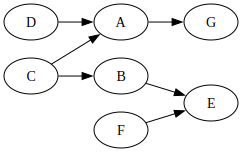

In [1]:
import graphviz as gr

g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

The python library `networkx` is good for analysis of and computation on graphs.

**Definition:** If $A\perp B |C$ then $A$ and $B$ are  <u>d-separated</u> given $C$.


In [6]:
import networkx as nx

model = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G"),
])

print("Are D and C dependent given A?") # Immorality conditioned
print(not(nx.d_separated(
    G=model, 
    x= {"D"}, y={"C"}, 
    z= {"A"} # Hold z fixed. Can be empty set.
)))

print("Are A and B dependent given C?") # fork conditioned
print(not(nx.d_separated(model, {"A"}, {"B"}, {"C"})))

print("Are A and B dependent?") # fork, no conditions.
print(not(nx.d_separated(model, {"A"}, {"B"},{})))

Are D and C dependent given A?
True
Are A and B dependent given C?
False
Are A and B dependent?
True


## Identification as closing backdoors

We want to asses if hiring a consultant has a treatment effect on profits in the next 6 months based on the following causal graph. 

<img src="images/Screenshot 2024-01-04 at 2.37.28 PM.png" width ="300">


There are two paths of association between `consultancy` and `profivs_next_6m`;
1. directly
2. through the fork 

**Definition:** A path in a causal graph that gives association between the cause and effect other than the direct path is a <u>back door</u>. 

Observed association between consultancy and proficts_next_6m can not be attributed to  `consultancy` alone because of this back door. 

You will close all undesirable flows of association in your graph in the identification phase of causal inference; conditioning thusly leads to a place where you can make the CIA assumption.

In the graph above, one needs to close the back door $X$ so that $(Y_0,Y_1) ⊥T |X$. The causal graph is just a model, and this conditional dependence is always an assumption. 



**Definition:** Closing backdoor paths by adjusting for confounders is <u>backdoor adjustment</u>

**Defnition:** The <u>adjustment formula</u> (or conditionality principle) is the pair of equations
$$
\begin{array}{ll}
ATE_x & = E[Y(1) | X=x] - E[Y(0)|X=x]\\
      &\stackrel{CIA}{=} E[Y|T=1,X=x] - E[Y|T=0,X=x], \\
      ATE &= E_X[ATE_x].
\end{array}
$$

Sometimes one but not the other term for $\text{ATE}_x$ in the adjustment formula is not be emprically estimable because there are no units in the group with $X=x$. 

**Definition:**  The <u>Positivity Assumption</u> is that there are some units in the treatment and some in the control for each value of $x$. 

aka 
- common support assumption 
- overlap assumption 

e.g. Three companies have past profit 1M, three have past profit 5M. Three companies have had consulting, three have not.

In [39]:
df = pd.DataFrame(dict(
    profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
    consultancy=[0, 0, 1, 0, 1, 1],
    profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
))

df

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


In [42]:
# Association; ATE under ignorable treatment effect assumption. 
association = (df.query("consultancy==1")["profits_next_6m"].mean() 
               - df.query("consultancy==0")["profits_next_6m"].mean())
print(f"The association is {association}")

The association is 1.666666666666667


But this is a biased treatment effect because size of company correlates with seeing consultancy. To work toward holding size of the compay constant, that is conditioning on `profits_prev_6m` we groupby.

In [43]:
avg_df = (df
          .groupby(["consultancy", "profits_prev_6m"])
          ["profits_next_6m"]
          .mean()
         )
avg_df

consultancy  profits_prev_6m
0            1.0                1.05
             5.0                5.50
1            1.0                1.20
             5.0                5.70
Name: profits_next_6m, dtype: float64

In [44]:
# Filter for consultancy=0
avg_df.loc[0] 

profits_prev_6m
1.0    1.05
5.0    5.50
Name: profits_next_6m, dtype: float64

In [45]:
# Change in average profit with respect to consulting.
delta_profit = avg_df.loc[1] - avg_df.loc[0] 
for i in delta_profit.index:
    print(f"ATE_(${i}M) = E[Y|T=0,X={i}] - E[Y|T=1,X={i}] = ${delta_profit[i]}M")
ATE = delta_profit.mean()
print(f"ATE = ${ATE}M")

ATE_($1.0M) = E[Y|T=0,X=1.0] - E[Y|T=1,X=1.0] = $0.1499999999999999M
ATE_($5.0M) = E[Y|T=0,X=5.0] - E[Y|T=1,X=5.0] = $0.20000000000000018M
ATE = $0.17500000000000004M


So, the back door adjustment takes us from $\$1.67M$  to $\$175k$, an order of magnitude.

Front door adjustments also exist but are not commonly needed. 

## Confounding Bias 

Confounding is a form of bias. It usually happens when T and Y shave a common cause forming a back door through a fork with T and Y as terminal nodes. 

<img src="images/Screenshot 2024-01-04 at 2.37.28 PM.png" width ="300">

If you can't observe a confounding variable, then you can't condition on it. 

### Surrogate Confounding

Sometimes there is a counfounding variable that you can not observe, you have other observables that can act as proxies; example, you can’t measure manager quality, but you can measure 
- some of its causes, like 
    - the manager’s tenure or 
    - level of education; and 
- some of its effects, like 
    - the team’s attrition or performance.
    
Controlling for those surrogate variables may partially or completely eliminate confounding bias from an unobservable confounding.

## Selection bias

Selection bias happens when you condition on a common effect. In the diagram below, $S$ is a common effect of $T$ and $Y$.

<img src="images/common_effect.svg" width="300">

e.g. Satisfied customers are more likely to answer a survey, so if 
- treatment is a new feature on an app (A/B tested)
- outcome ($Y$) is customer satisfaction
- measurement of treatment effect ($\delta Y$)is an optional survey 

Then 
1. those given the treatment are more likely to take the survey, $T\to S$  
2. those that are more satisfied are more likely to take the survey

Then the survey is a collider, and if you take into account only those that respond to the survey then you are conditioning on the survey. This allows a back door from T to Y. This is selection bias.x

Note: There isn’t a consensus in the literature on the names of biases. some scientists like to further segment what I’m calling selection bias into collider bias and mediator bias. 

Selection bias is what Fraser called pretreatment heterogeneity bias but conditioned on some collider $S$; do the treatment group and non-treatment group have different no-treatment potential outcomes?
$$
\text{PHB} = \text{Selection Bias} = E[Y_0 | T=0,S=1] −E[Y_0| T=1,S=1].
$$

### Adjusting for Selection Bias
tldr; change you graphical causal model.

In the example, you can’t close the noncausal flow of association between the new feature and customer satisfaction by conditioning on those who responded to the survey because you only have data from the respondants, and no data from the non-responders. 

<img src="images/cant_close.svg" width="300">

To make some progress, you need to make further assumptions. For instance, you need to assume that customer satisfaction doesn’t cause customers to be more or less likely to answer the survey. Instead, you would have some other observable variable (or variables) that cause both selection and the outcome. This means modifying the graph. This is a change of your graphical causal model. 

For example, it could be that the only thing that causes customers to respond to the survey is the time they spend in the app and the new feature.

<img src="images/time_causes_response.svg" width="300">

This modification is an assumption. Only expert knowledge will be able to tell how strong an assumption. Conditioning on `time_in_app` $= X$ means calculating 

$$
ATE_x = E[Y|T=1,S=1,X=x]−E[Y|T=0,S=1,X=x]\\
ATE=\sum_x ATE_x P(X=x|S=1)
$$

Generally speaking, to adjust for selection bias, you have to 
1. adjust -you causal graphical model for whatever causes selection so that you
2. assume that neither the outcome nor the treatment 
    - causes selection directly or 
    - shares a hidden common cause with selection.

### Conditioning on a Mediator

You can also cause selection bias inadvertently. 

<img src="images/two_paths.svg">

Here, if you are trying to calculate the treatment effect of gender on sallary, conditioning on seniority finds the ATE of gender directly on salary, eliminates the indirect path through promotion/seniority, and actually remove some of what you want. 





This is not crystal clear, but the general idea that I want to know the sum of the treatment effects from T and M makes sense. 